#### Distance Metrics to be Tested

1. Cosine 
2. Euclidean
3. Yule

In [1]:
#'''Required Libraries (uncomment for installation)'''

# !pip install pandas
# !pip install numpy
# !pip install scipy

In [304]:
'''Importing Libraries'''

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

#### Distance Calulations

In [307]:
def plot_graph(sim_arr, model, label, k, gr_type = '-k'):
    x = np.linspace(0, len(sim_arr)-1, len(sim_arr), dtype=int)
    plt.plot(x, sim_arr, gr_type)

    plt.title("Distance Similarity Scores at k = " + k)              
    plt.xlabel('Count')
    plt.ylabel('Simialrity Scores')

In [308]:
def plot_avg(arr, k, gr_type = '-k'):
    plt.plot(arr, k, gr_type)

In [309]:
'''Calculations to cehck the closest analogy answer'''

def after_distance(cont_arr, optio):

    max_arr, idx2, word = [], [], []
    
    for instances in range(len(cont_arr)):
        max_arr.append(np.amax(cont_arr[instances]))
    
    for ind_val2 in range(len(max_arr)):
        idx2.append(np.where(cont_arr[ind_val2] == max_arr[ind_val2]))
    
    idx2 = np.asarray(idx2)

    for i in range(len(optio)):
            word.append(optio[i][idx2[i]])

    return max_arr, word

In [316]:
'''Calculating Distance Function'''


def cal_distances(quest, optio, k, model="LSA"):    
    cosi_arr, eucd_arr, yule_arr = [], [], []

    for i in range(len(quest)):
        tmp_arr_cosi, tmp_arr_eucd, tmp_arr_yule = [], [], []
        
        for j in range(len(optio[i])):
            
            if model == "LSA":
                # Calculating Cosine 
                tmp_arr_cosi.append(1 - (distance.cosine(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                         dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))

                # Calculating Euclidean 
                tmp_arr_eucd.append(1 - (distance.euclidean(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                            dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))

                # Calculating Yule
                tmp_arr_yule.append(1 - (distance.yule(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                       dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))
            
                
            elif model == "GloVe":
                # Calculating Cosine 
                tmp_arr_cosi.append(1 - (distance.cosine(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                         glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))

                # Calculating Euclidean 
                tmp_arr_eucd.append(1 - (distance.euclidean(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                            glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))

                # Calculating Yule
                tmp_arr_yule.append(1 - (distance.yule(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                       glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))
                
        
        
        # Appending Arrays
        cosi_arr.append(tmp_arr_cosi)
        eucd_arr.append(tmp_arr_eucd)
        yule_arr.append(tmp_arr_yule)
    
    
    # Calling function to get the highest similarity array and the highest similarty word
    max_arr_cosi, word_cosi = after_distance(cosi_arr, optio)
    max_arr_eucd, word_eucd = after_distance(eucd_arr, optio)
    max_arr_yule, word_yule = after_distance(yule_arr, optio)
    
    
    
    '''Genrating Dataframes'''
  
    # For Human Prompt and Smilarity Scores wrt all prompts
    df_question  = pd.DataFrame(quest, columns=["Quest 1", "Quest 2", "Quest 3"])
    df_human_ans  = pd.DataFrame(ans_list, columns=["Prompt 1", "Prompt 2", "Prompt 3", "Prompt 4", "Prompt 5",])
    

    cosi_sim_scores = pd.DataFrame(cosi_arr, columns=["Similarity 1", "Similarity 2", "Similarity 3", "Similarity 4", "Similarity 5",])
    eucd_sim_scores = pd.DataFrame(eucd_arr, columns=["Similarity 1", "Similarity 2", "Similarity 3", "Similarity 4", "Similarity 5",])
    yule_sim_scores = pd.DataFrame(yule_arr, columns=["Similarity 1", "Similarity 2", "Similarity 3", "Similarity 4", "Similarity 5",])
    
    
    # Merging known Datasets
    cosi_scores = df_question.join(cosi_sim_scores)
    eucd_scores = df_question.join(eucd_sim_scores)
    yule_scores = df_question.join(yule_sim_scores)
    
    cosi_merge_df = cosi_scores.join(df_human_ans)
    eucd_merge_df = eucd_scores.join(df_human_ans)
    yule_merge_df = yule_scores.join(df_human_ans)

    
    # For Calculated output derived from highest similarity
    tmp_cosi_df = pd.DataFrame({"Calculated":word_cosi, "Model Similarity": max_arr_cosi})
    tmp_eucd_df = pd.DataFrame({"Calculated":word_eucd, "Model Similarity": max_arr_eucd})
    tmp_yule_df = pd.DataFrame({"Calculated":word_yule, "Model Similarity": max_arr_yule})
    
    
    # Merging different distance metrics into single Dataframe
    cosi_df = tmp_cosi_df.join(cosi_merge_df)
    eucd_df = tmp_eucd_df.join(eucd_merge_df)
    yule_df = tmp_yule_df.join(yule_merge_df)


    # Generating Plots
    for _ in k:
        plot_graph(max_arr_cosi, model, label = 'Cosine Distance', k = k, gr_type = '-r')
        plot_graph(max_arr_eucd, model, label = 'Euclidean Distance', k = k, gr_type = '-b')
        plot_graph(max_arr_yule, model, label = 'Yule Distance', k = k, gr_type = '-c')
        plt.show()
        
     
    return cosi_df, eucd_df, yule_df

#### Calling Questions and Options Dataframes for list Conversions 

In [282]:
'''Create List for Questions, Options, and Answers (Human Prompts)'''

def conv_list(df):
    que_list, opt_list, ans_list = [], [], []
    
    for idx, row in df.iterrows():
        tmp_list_que = [row.prompt1, row.prompt2, row.prompt3]
        tmp_list_opt = [row.response1, row.response2, row.response3, row.response4, row.response5]
        tmp_list_ans = [row.response1, row.response2, row.response3, row.response4, row.response5]

        que_list.append(tmp_list_que)
        opt_list.append(tmp_list_opt)
        ans_list.append(tmp_list_ans)

    return np.asarray(que_list), np.asarray(opt_list), np.asarray(ans_list)

In [283]:
question = pd.read_csv('Que_Opt2.csv', index_col=0)
que_list, opt_list, ans_list = conv_list(question)

### Importing Models

#### LSA .txt files for different k values

4.1418020617040385


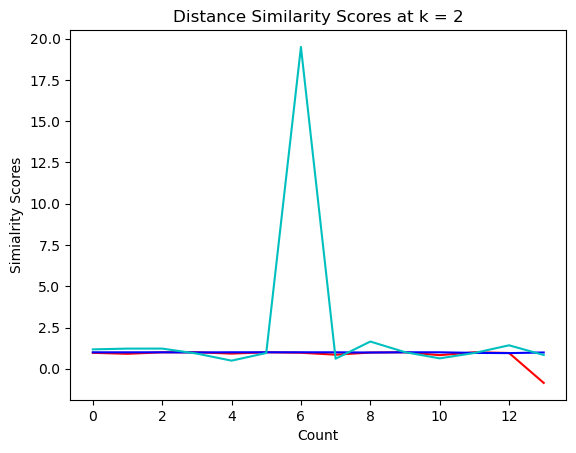

3.0215957737738526


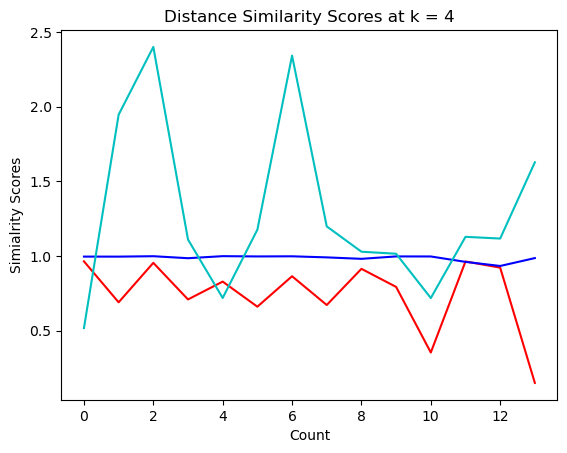

5.214020188685755


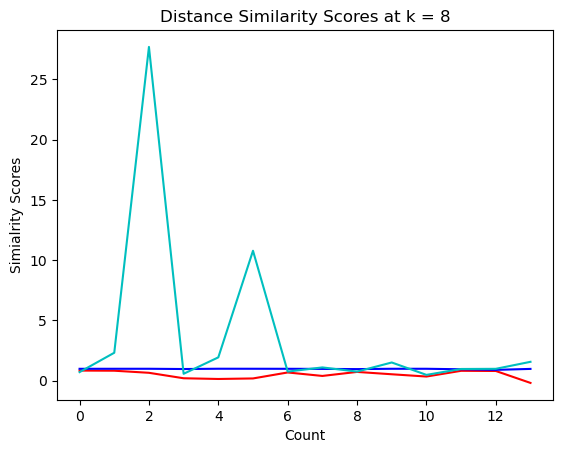

2.9147169975225538


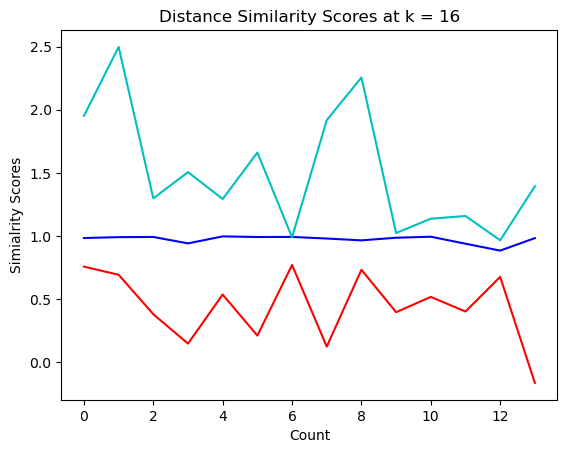

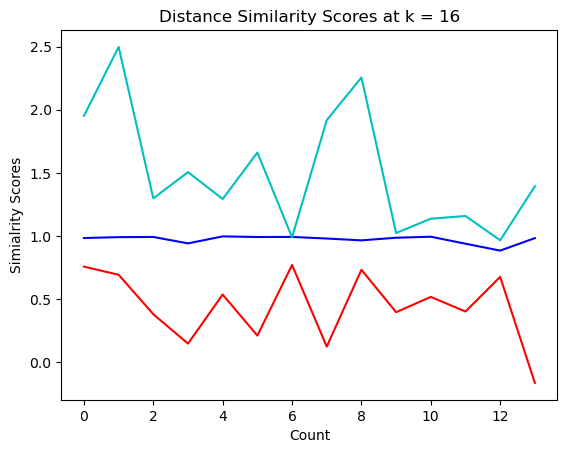

3.7876831197284573


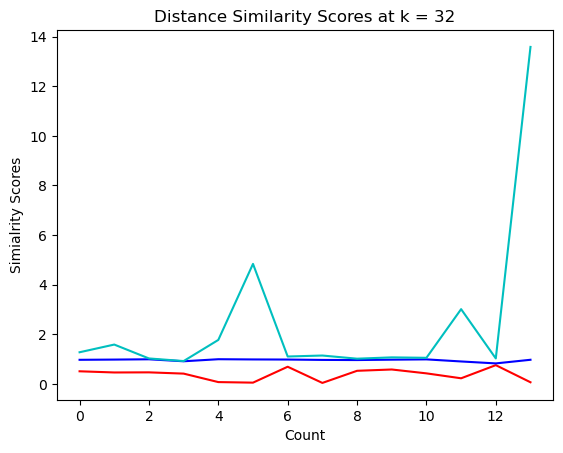

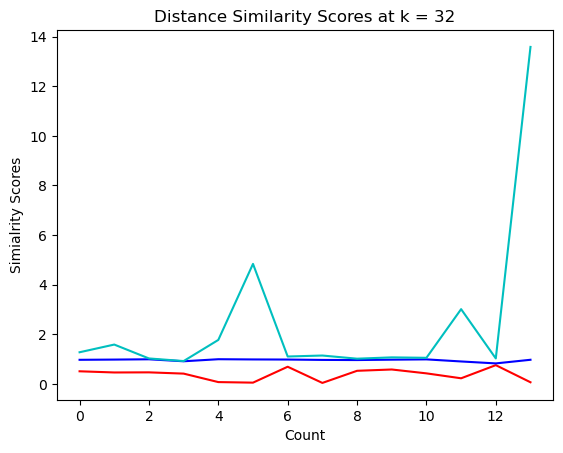

6.354544795054018


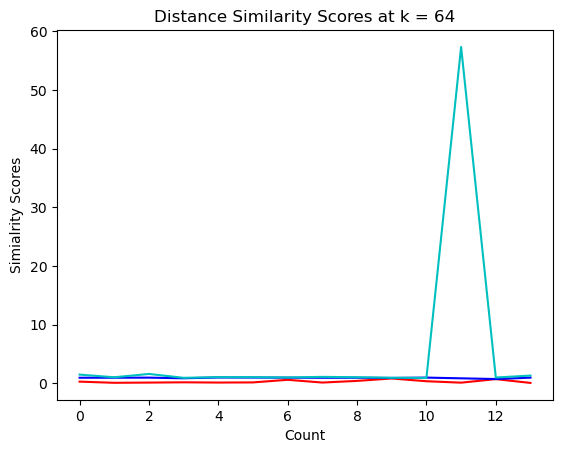

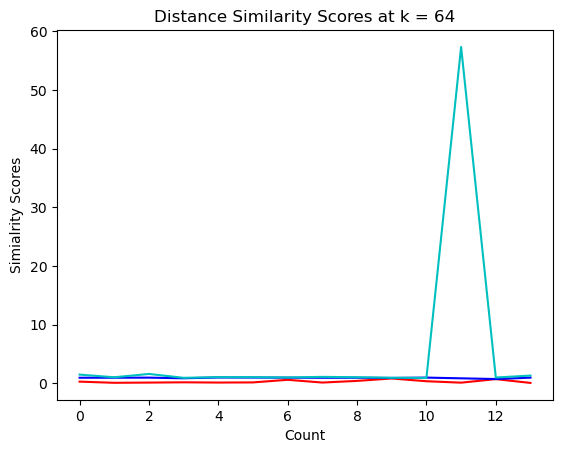

3.4119768489431044


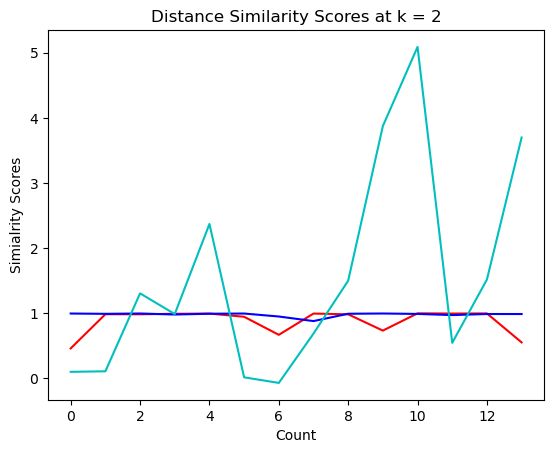

3.222206268576363


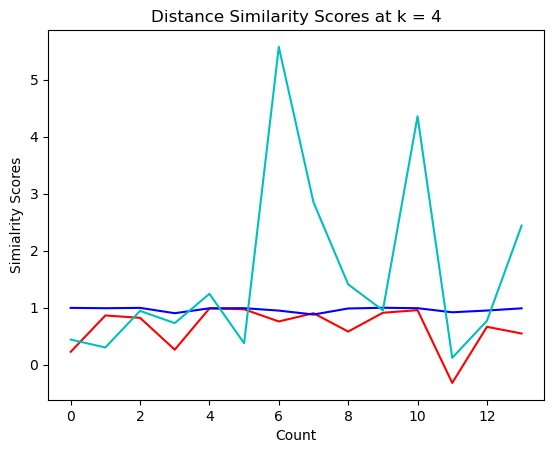

3.9797238173926868


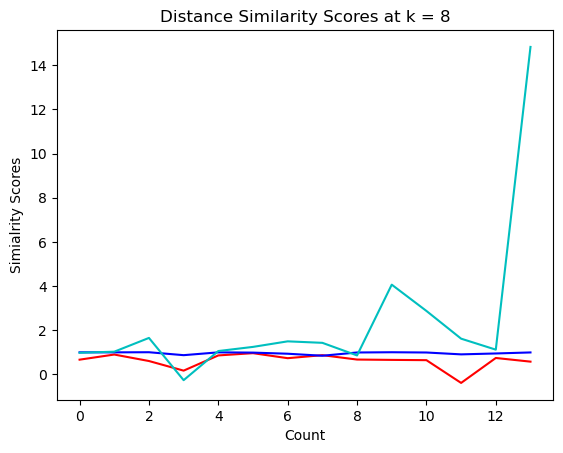

6.918093800752887


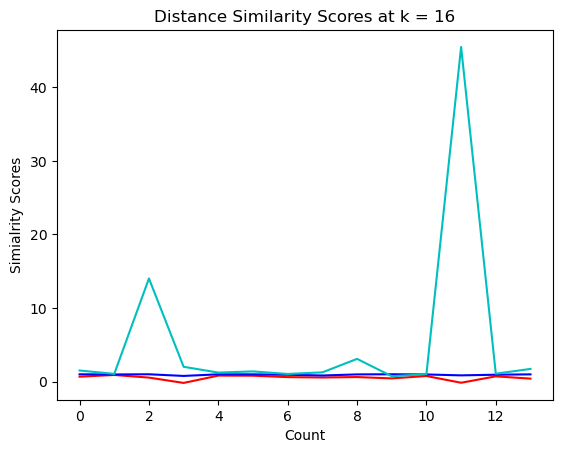

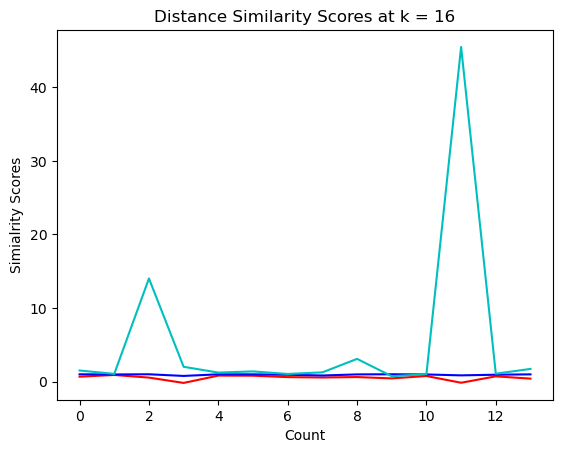

2.8671708146438055


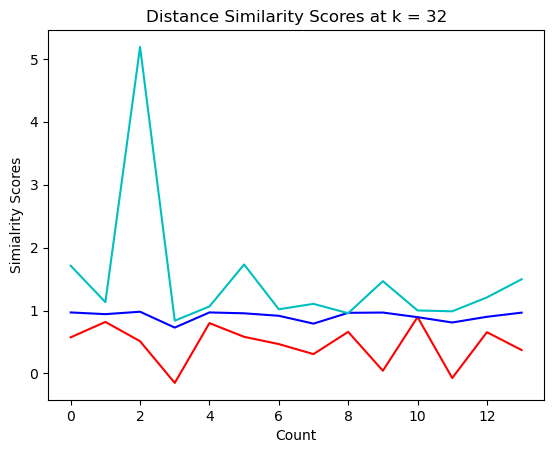

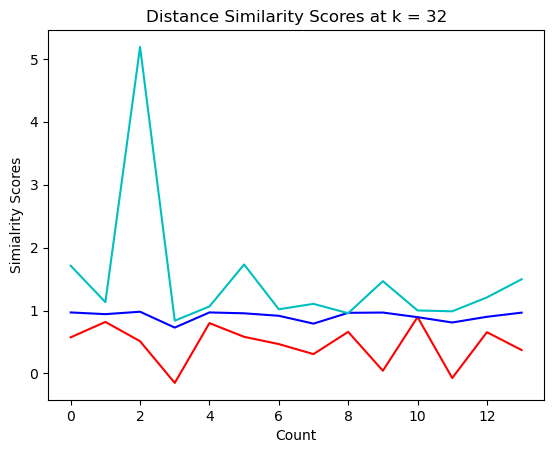

2.5065631446702046


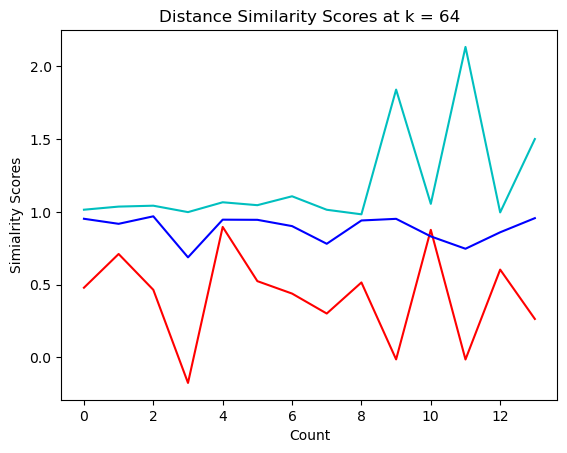

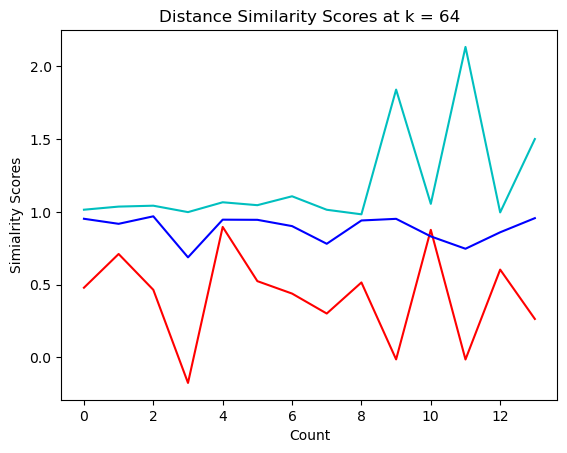

3.118086662910524


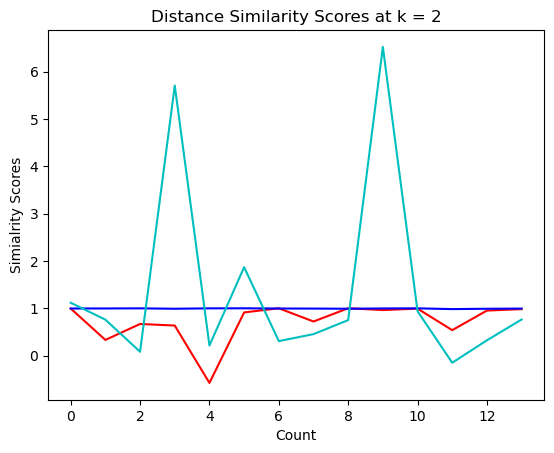

3.167247379118825


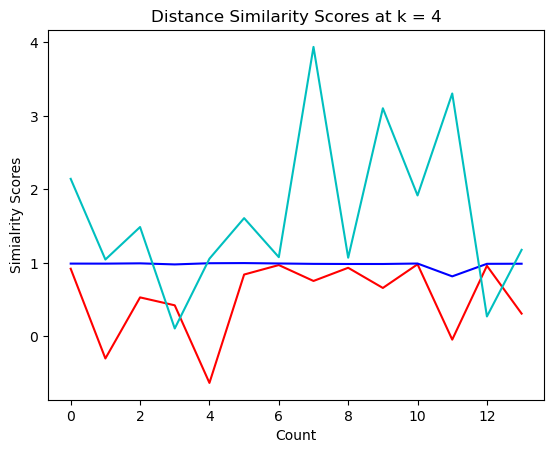

4.614961934062596


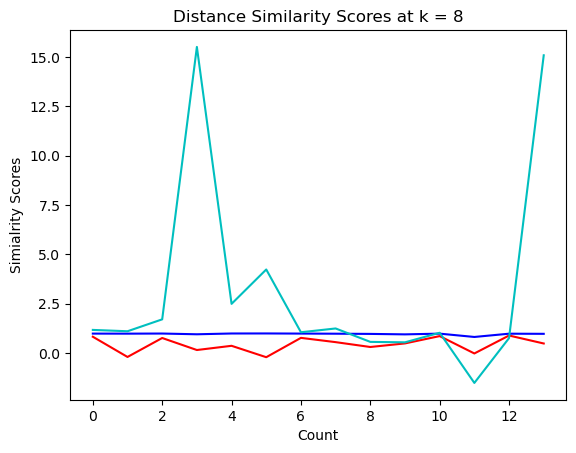

2.459172881387815


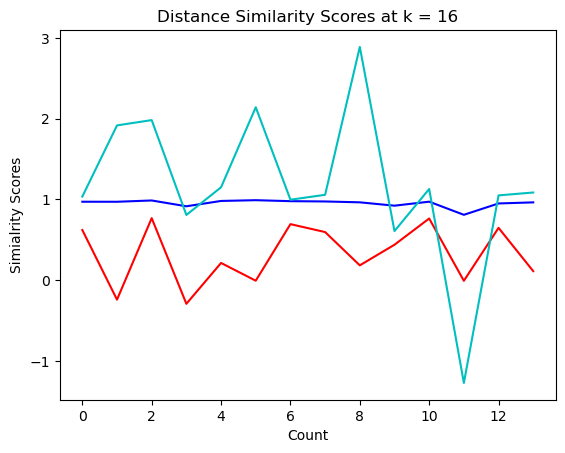

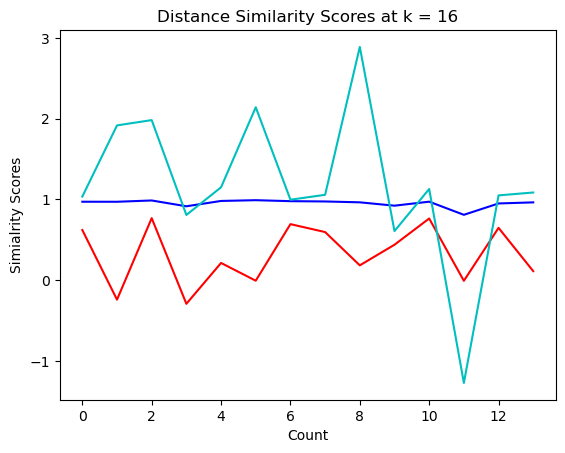

9.306830804994135


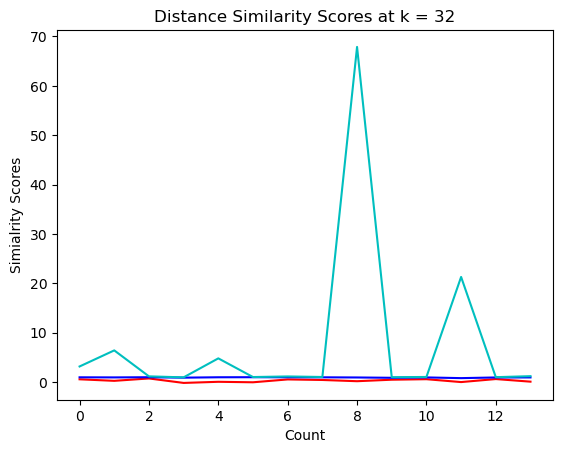

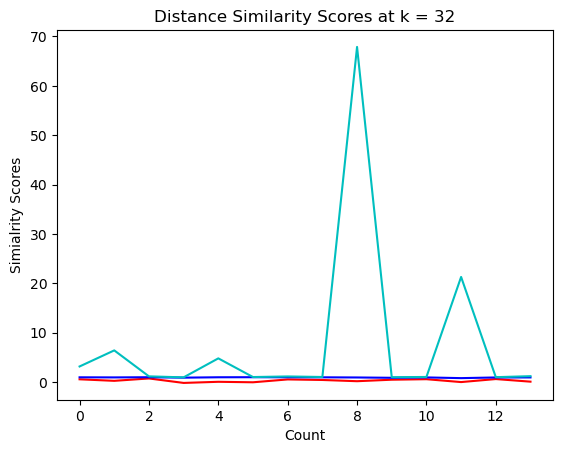

3.760355054022915


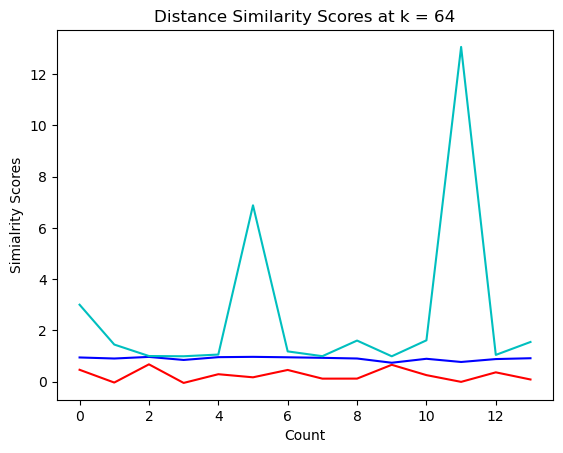

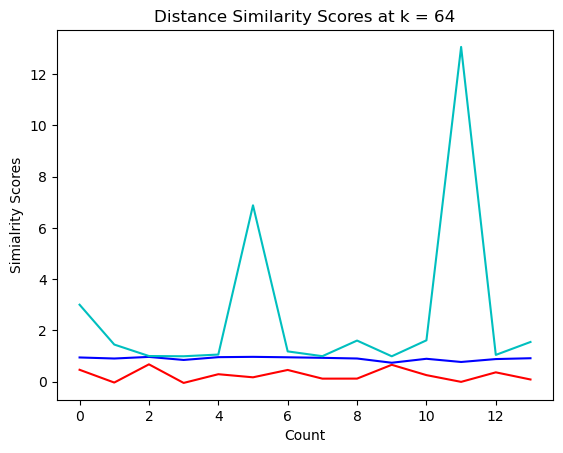

In [317]:
# For fictional genere and all k values runs

'''Importing all txt File and converting into '''

import pickle

k_arr = ["2", "4", "8", "16", "32", "64"]
genre_arr = ["fiction", "nonfiction", "poetry"]      # Make changes in the loop - currently set to genre_arr[0] as default

for i in range(len(genre_arr)):
    for j in range(len(k_arr)):
        
        ## Calling LSA model
        path = genre_arr[i] + "_term_embeddings_TXT/term2topic_" + genre_arr[i] + "_" + k_arr[j] + ".txt"
        
        word_file = open(path, "rb")
        word_vectors = pickle.load(word_file)
        word_file.close()
        dict_word_vectors = word_vectors
        
        # Calculating Distance 
        cosi_similarity, eucd_similarity, yule_similarity = cal_distances(que_list, opt_list, k = k_arr[j], model="LSA")
        

        # Displaying Similarity Scores
        display(cosi_similarity.style.set_caption("Cosine Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        display(eucd_similarity.style.set_caption("Euclidean Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        display(yule_similarity.style.set_caption("Yule Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        
        

#### Glove 

In [273]:
## Parsing File for non-LSA models

def parse_file(file_name):
    word_vectors = {}
    with open(file_name, encoding='utf-8') as f:
        for line in f:
            first_whitespace = line.index(" ")
            word = line[:first_whitespace].strip('"')
            vector = np.array(line[first_whitespace + 1:].split(" "), dtype=np.float32)
            word_vectors[word] = vector
            
    return word_vectors

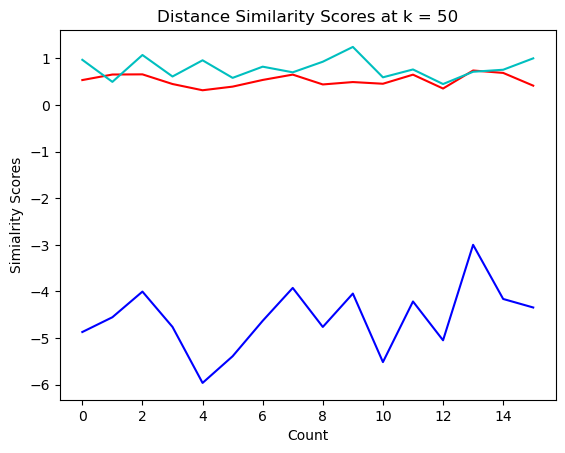

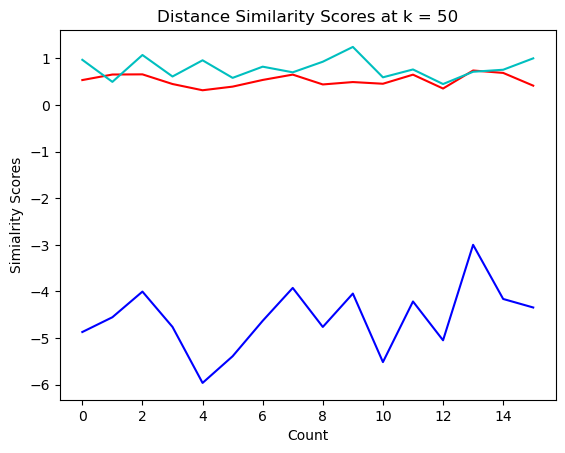

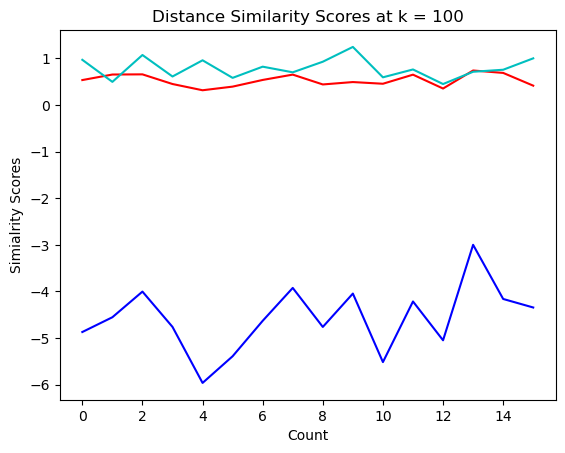

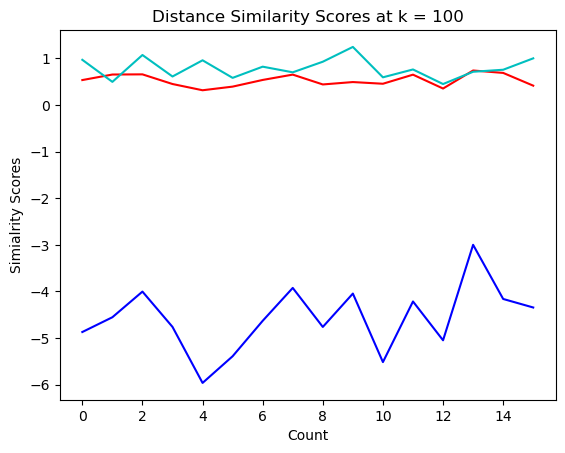

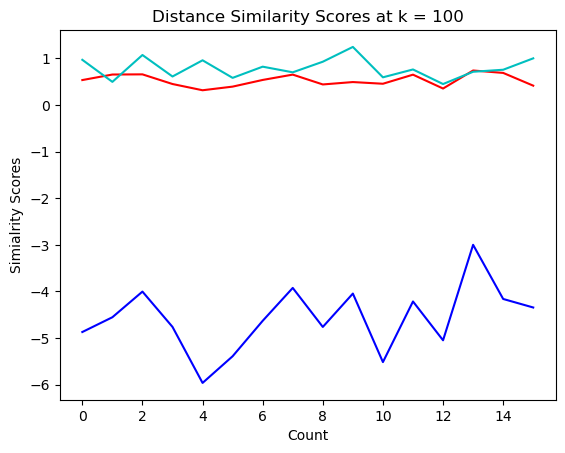

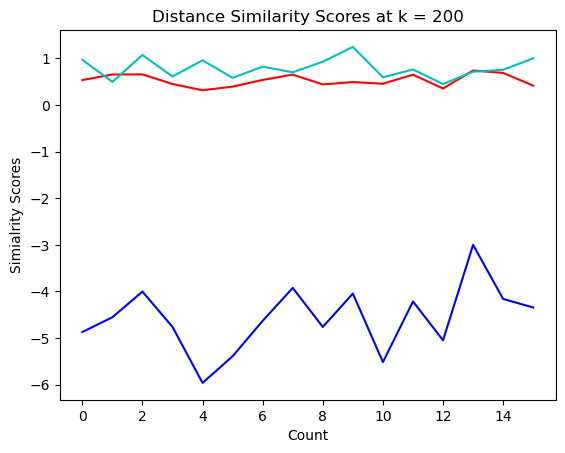

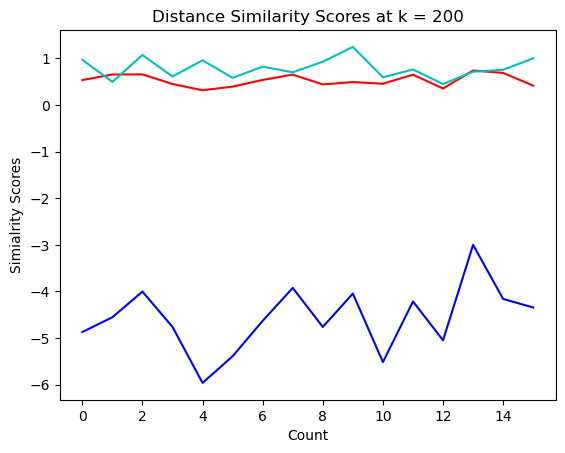

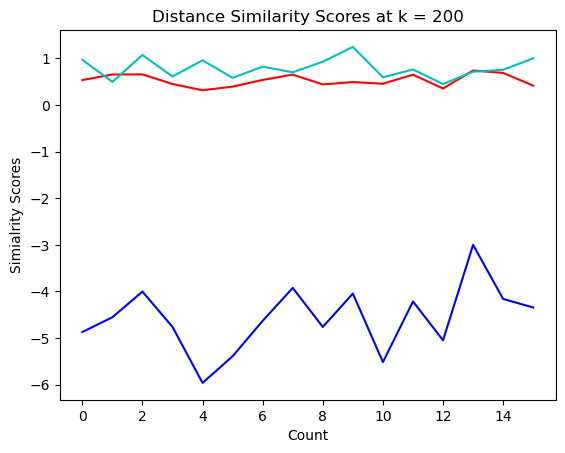

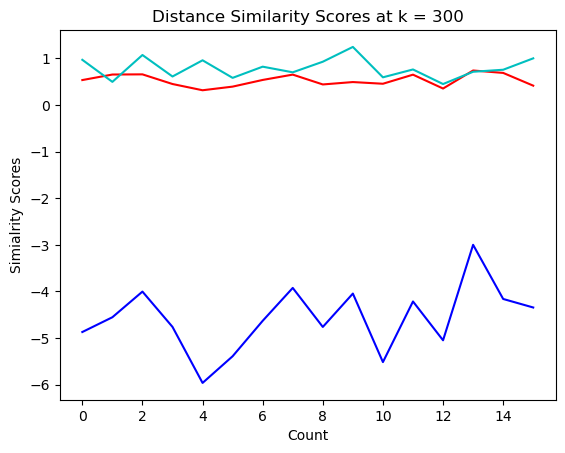

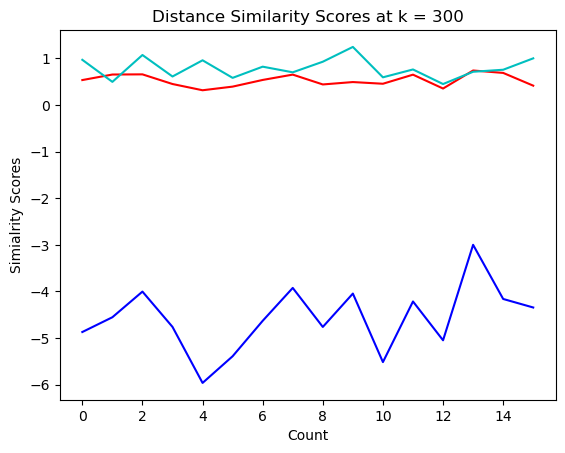

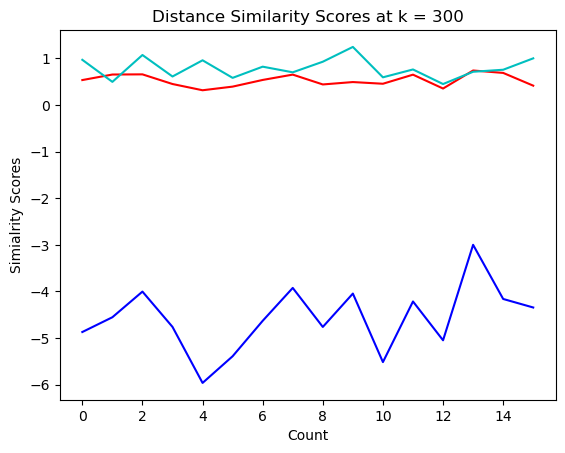

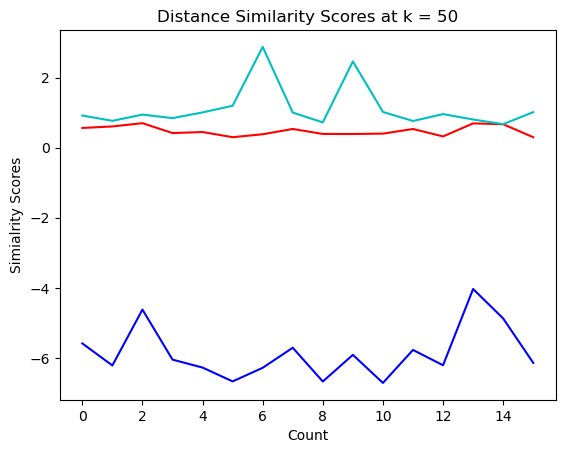

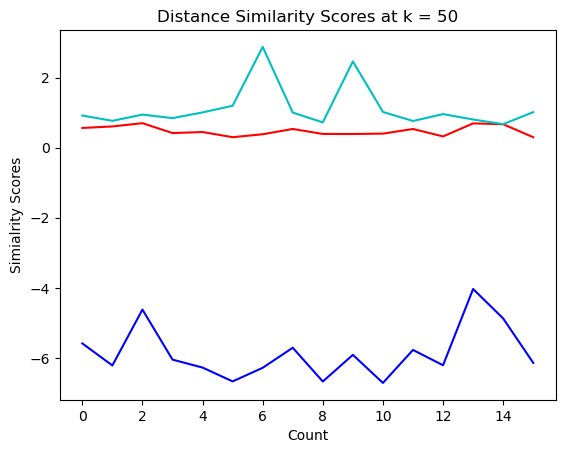

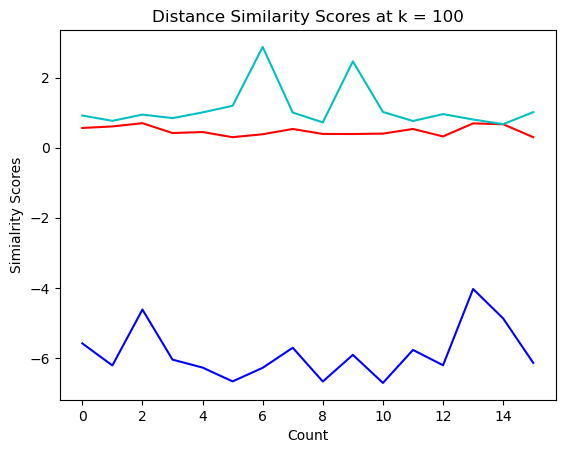

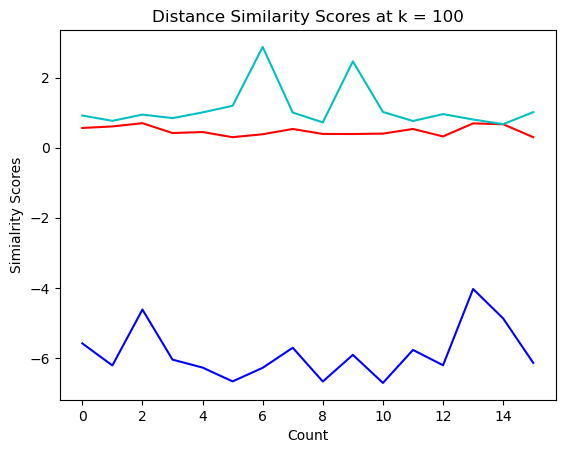

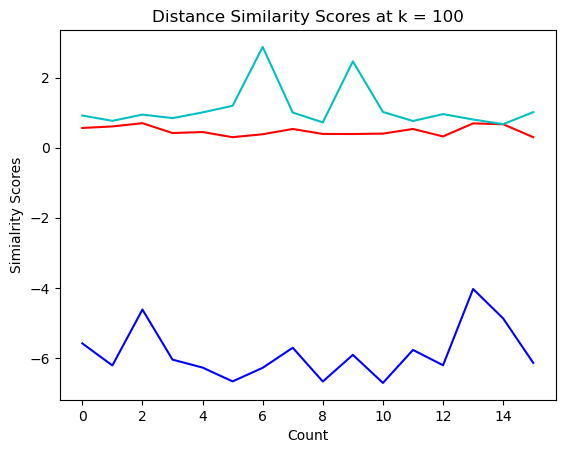

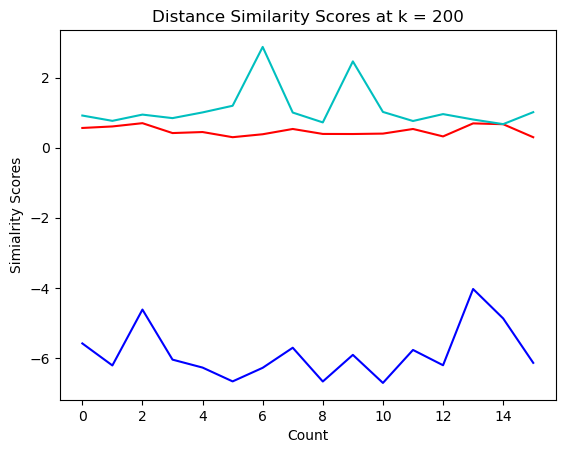

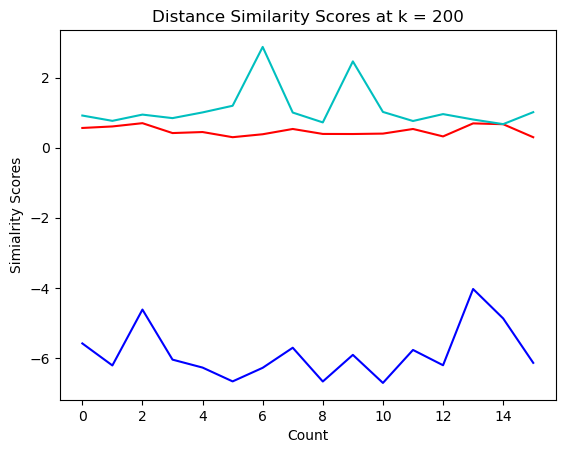

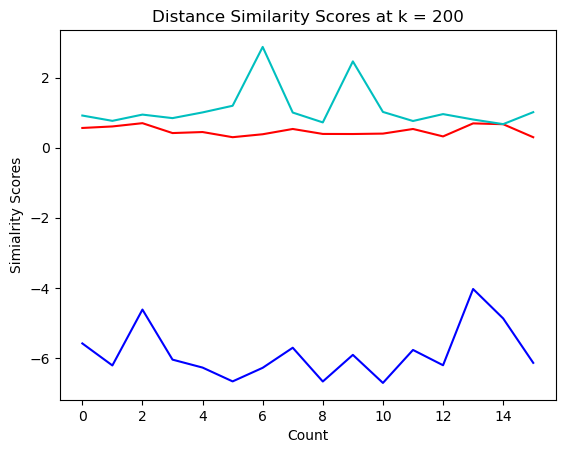

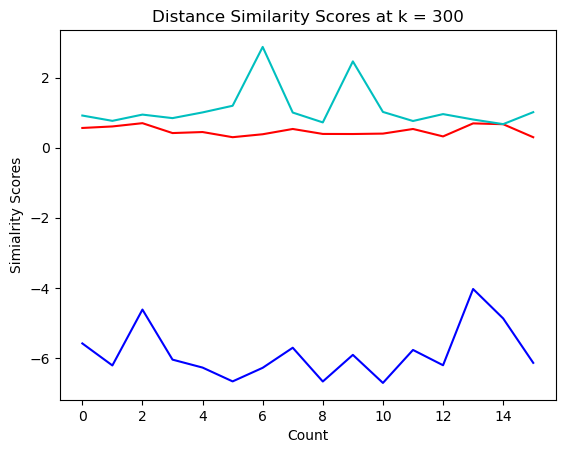

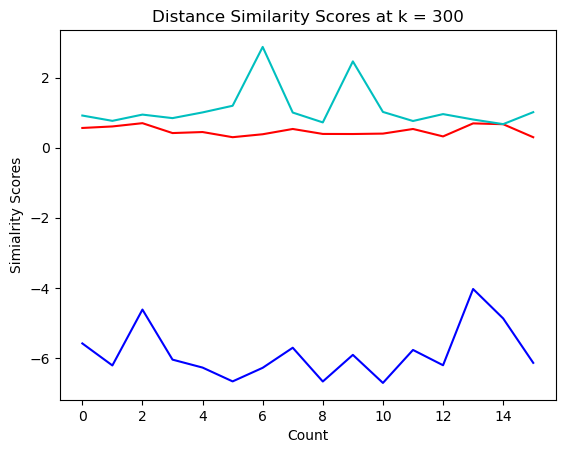

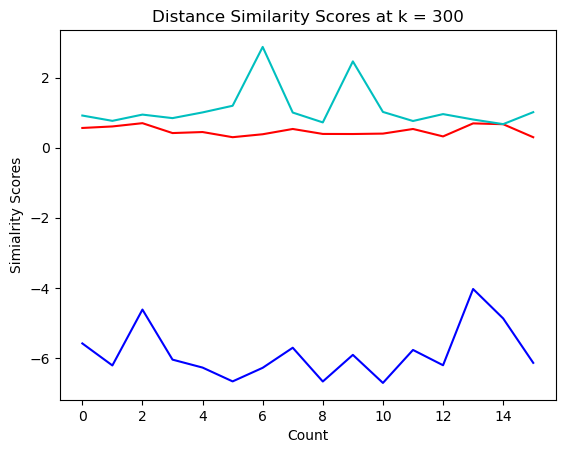

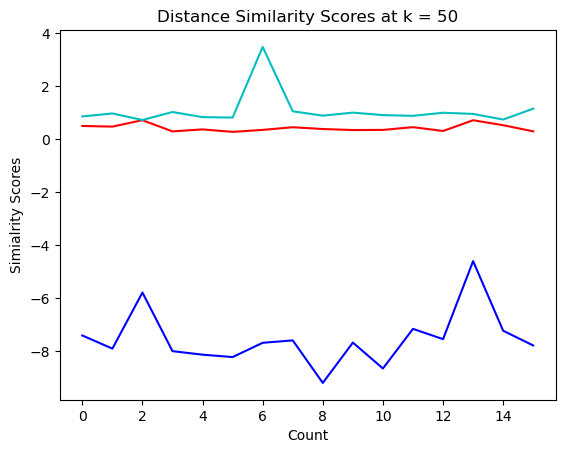

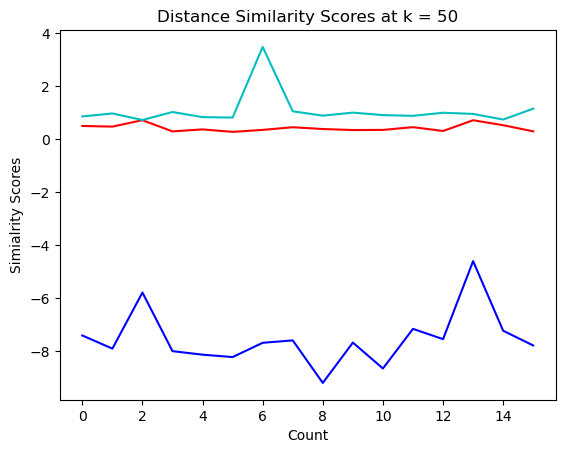

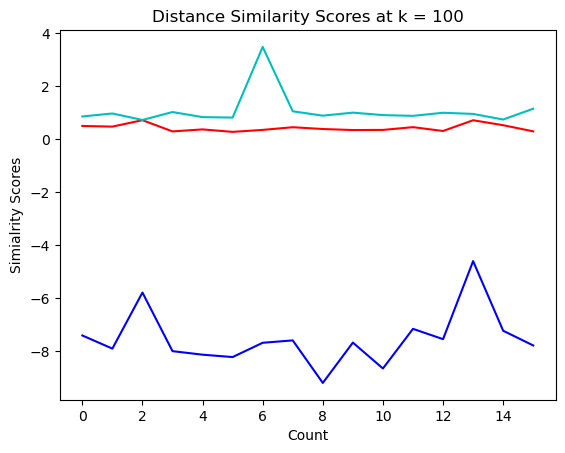

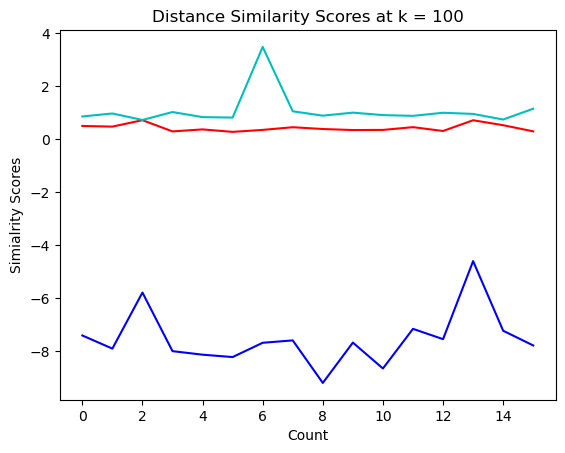

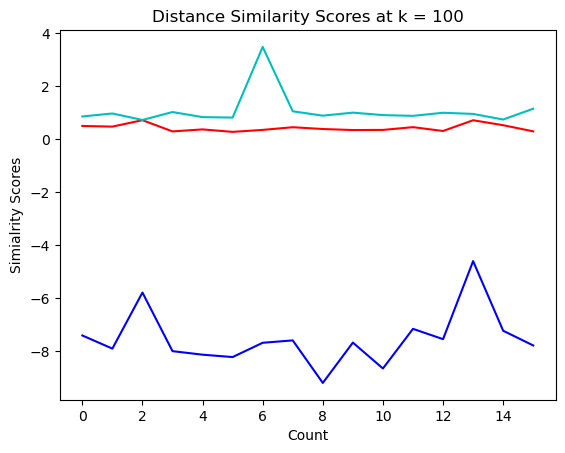

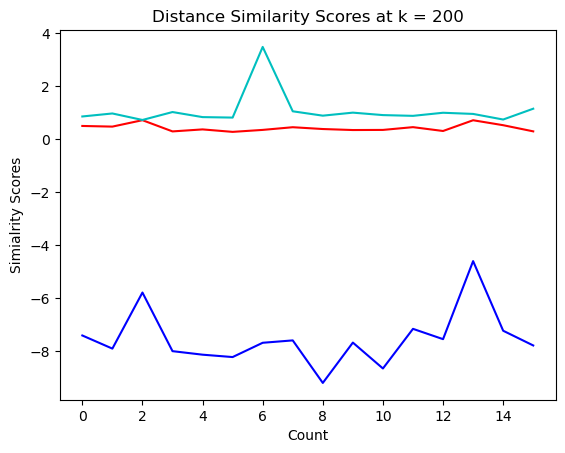

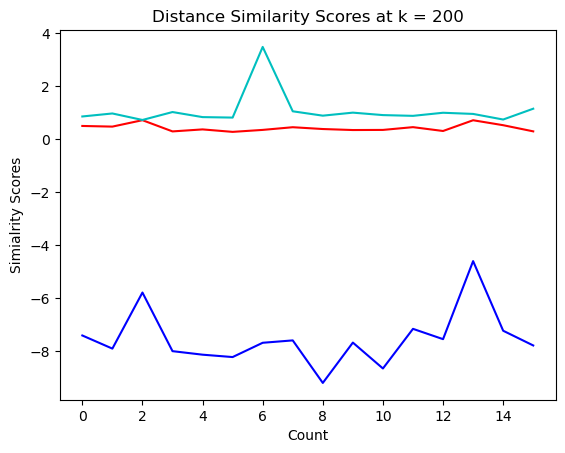

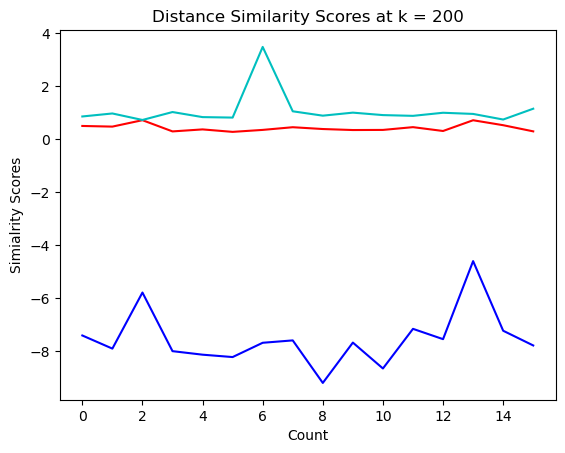

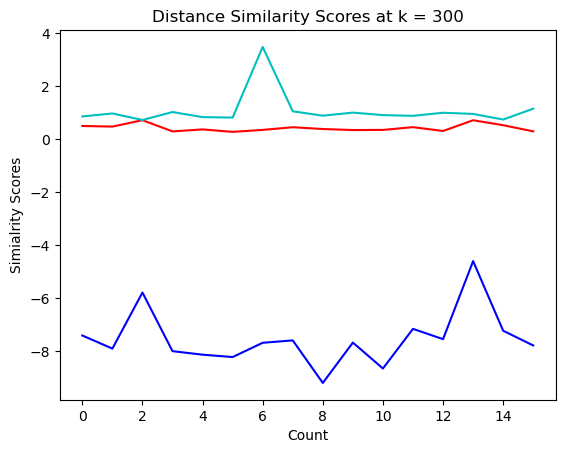

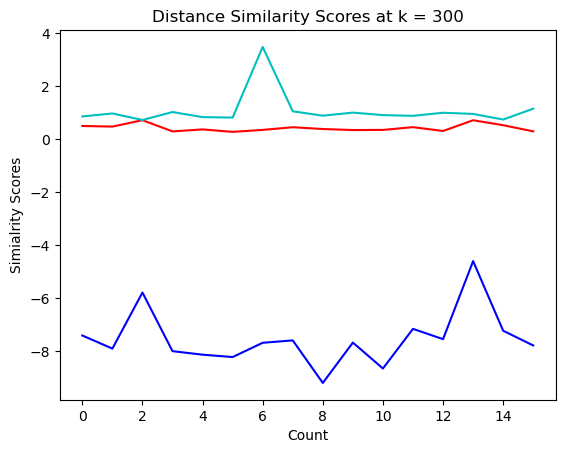

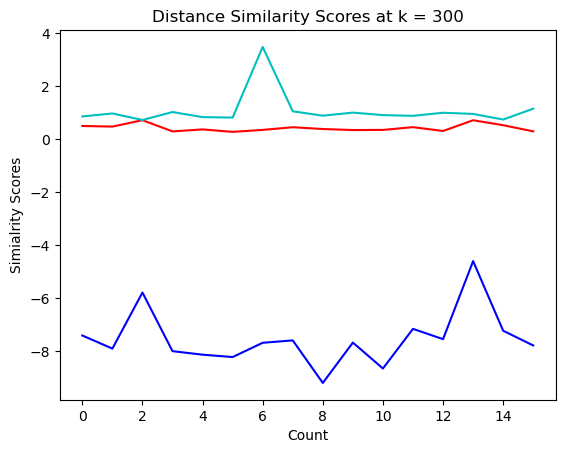

In [274]:
glove_arr = ["50", "100", "200", "300"]

## Calling Glove Model

for i in range(len(genre_arr)):
    for j in range(len(glove_arr)):
        
        path = "glove.6B/glove.6B." + glove_arr[i] + "d.txt"
        glove_word_vector = parse_file(path)
        
        cosi_similarity_glove, eucd_similarity_glove, yule_similarity_glove = cal_distances(que_list, opt_list, k = glove_arr[j], model="GloVe")

        # Displaying Similarity Scores

        display(cosi_similarity_glove.style.set_caption("Glove Cosine Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))
        display(eucd_similarity_glove.style.set_caption("Glove Euclidean Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))
        display(yule_similarity_glove.style.set_caption("Glove Yule Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))



#### MDS

In [182]:
# # For Single File Tests

# '''Importing pickle txt File'''

# import pickle

# # Provide File Path
# path = "fiction_term_embeddings_TXT/term2topic_fiction_2.txt"

# word_file = open(path, "rb")
# word_vectors = pickle.load(word_file)
# word_file.close()

# dict_word_vectors = word_vectors
# dict_word_vectors

In [ ]:
# Prior Code for returning calculated word and similarity scores
# '''Calculations to cehck the closest analogy answer'''

# def after_distance(cont_arr, optio):

#     max_arr, idx2, word = [], [], []
    
#     for instances in range(len(cont_arr)):
#         max_arr.append(np.amax(cont_arr[instances]))
    
#     for ind_val2 in range(len(max_arr)):
#         idx2.append(np.where(cont_arr[ind_val2] == max_arr[ind_val2]))
        
#     idx2 = np.asarray(idx2)

#     for i in range(len(optio)):
#             word.append(optio[i][idx2[i]])

#     return max_arr, word